In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

%matplotlib inline

In [89]:
data = pd.read_csv('kc_house_data.csv')

In [90]:
print(data.shape)
data.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [91]:
#drop columns seen as irrelevant
data.drop(columns = ['id','date','view','lat','long'], inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,1600,0.0,2004,0.0,98027,1410,1287


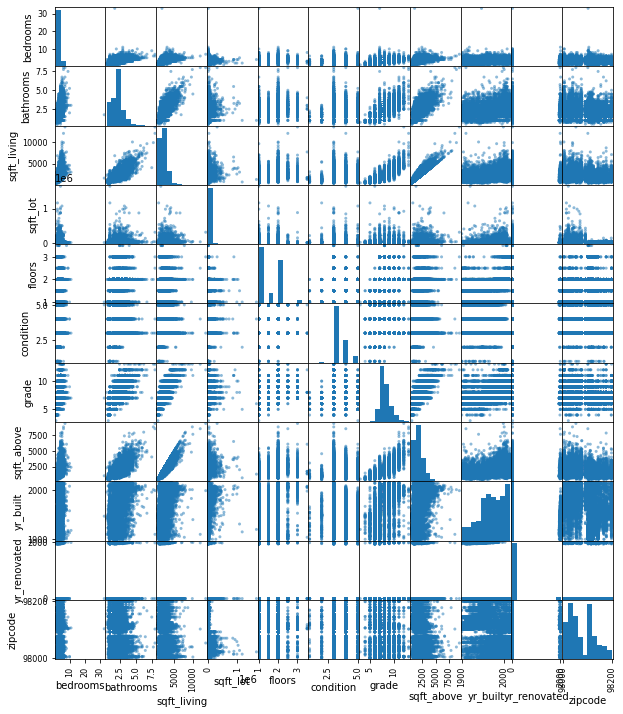

In [92]:
#scatter matrix for data, took out price (target), left out sqft_basement, yr_built, yr_renovated, 
#waterfront, sqft_living15, & sqft_lot15
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode']
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [93]:
#df to look for collinearity in predictors bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, 
#sqft_basement, yr_built, and zipcode
data_pred = data.iloc[:,[1,2,3,4,9,10,11,13]]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
0,3,1.00,1180,5650,1180,0.0,1955,98178
1,3,2.25,2570,7242,2170,400.0,1951,98125
2,2,1.00,770,10000,770,0.0,1933,98028
3,4,3.00,1960,5000,1050,910.0,1965,98136
4,3,2.00,1680,8080,1680,0.0,1987,98074


In [94]:
#collinearity matrix
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode
bedrooms,1.000000,0.514508,0.578212,0.032471,0.479386,0.155670,-0.154092
bathrooms,0.514508,1.000000,0.755758,0.088373,0.686668,0.507173,-0.204786
sqft_living,0.578212,0.755758,1.000000,0.173453,0.876448,0.318152,-0.199802
sqft_lot,0.032471,0.088373,0.173453,1.000000,0.184139,0.052946,-0.129586
sqft_above,0.479386,0.686668,0.876448,0.184139,1.000000,0.424037,-0.261570
yr_built,0.155670,0.507173,0.318152,0.052946,0.424037,1.000000,-0.347210
zipcode,-0.154092,-0.204786,-0.199802,-0.129586,-0.261570,-0.347210,1.000000


In [95]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new 
#column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

In [96]:
#list the pairs with a high correlation, indicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(bathrooms, sqft_living)",0.755758


In [97]:
#change the value ? to string 0
data['sqft_basement'] = data['sqft_basement'].replace(['?'],'0')

#convert datatype of sqft_basement column to float
data = data.astype({'sqft_basement': float})

#create new boolean column for whether property has a basement
data['has_base'] = np.where((data['sqft_basement'] > 0),1,0)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,has_base
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0


In [98]:
#fill NaN values in yr_renovated column with 0
data['yr_renovated'].fillna(0, inplace=True)

#create boolean column for whether a property has been renovated
data['has_renov'] = np.where((data['yr_renovated'] > 0),1,0)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,has_base,has_renov
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0


In [99]:
#fill NaN values waterfront column with 0 meaning no waterfront view
data['waterfront'].fillna(0, inplace=True)

#convert waterfront to boolean values
data.waterfront = np.where((data['waterfront'] == 1),1,0)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,has_base,has_renov
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0,1965,0.0,98136,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0


In [100]:
convert_dict = {'floors': str, 'condition':str, 'grade': str}
data = data.astype(convert_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  object 
 6   waterfront     21597 non-null  int64  
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  has_base       21597 non-null  int64  
 17  has_renov      21597 non-null  int64  
dtypes: flo

In [101]:
#create dummy variables for categoricals floors, condition, grade
floors_dum = pd.get_dummies(data['floors'], prefix='floor', drop_first=True)
condition_dum = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)
grade_dum = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)

In [102]:
data = data.drop(['floors', 'condition', 'grade'], axis=1)
data = pd.concat([data, floors_dum, condition_dum, grade_dum], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,221900.0,3,1.00,1180,5650,0,1180,0.0,1955,0.0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,0,2170,400.0,1951,1991.0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,0,770,0.0,1933,0.0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,0,1050,910.0,1965,0.0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,0,1680,0.0,1987,0.0,...,0,0,0,0,0,0,0,0,1,0


In [107]:
#left out sqft_basement as changed that predictor to categorical has_base
#floor predictor would not formulate so left out
outcome3 = 'price'
x_cols3 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','waterfront', 'sqft_above', 'yr_built', 
          'yr_renovated', 'zipcode', 'has_base', 'has_renov', 'cond_2', 'cond_3', 'cond_4', 'cond_5', 
          'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
          'grade_8', 'grade_9']
predictors3 = '+'.join(x_cols3)
formula3 = outcome3 + '~' + predictors3
model3 = ols(formula=formula3, data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1781.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:55:15   Log-Likelihood:            -2.9530e+05
No. Observations:               21597   AIC:                         5.907e+05
Df Residuals:                   21571   BIC:                         5.909e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.084e+06   2.97e+06      1.040      0.299   -2.73e+06     8.9e+06
bedrooms     -2.788e+04   2017.422    -13.819      0.000   -3.18e+04   -2.39e+04
bathrooms     5.584e+04   3326.301     16.786      0.000    4.93e+04    6.24e+04
sqft_living    135.8726      6.029     22.538      0.000     124.056     147.689
sqft_lot        -0.2605      0.036     -7.318      0.000      -0.330      -0.191
waterfront    7.296e+05   1.77e+04     41.118      0.000    6.95e+05    7.64e+05
sqft_above       3.4773      6.526      0.533      0.594      -9.315      16.270
yr_built     -3133.1590     72.352    -43.305      0.000   -3274.973   -2991.345
yr_renovated  3197.8441    497.116      6.433      0.000    2223.460    4172.228
zipcode         36.9156     29.791      1.239      0.215     -21.476      95.307
has_base      2.308e+04   5289.787      4.363      0.000    1.27e+04    3.34e+04
has_renov     -6.33e+06   9.92e+05     -6.380      0.000   -8.27e+06   -4.39e+06
cond_2       -4816.3425   4.23e+04     -0.114      0.909   -8.78e+04    7.81e+04
cond_3        2.653e+04   3.94e+04      0.674      0.500   -5.06e+04    1.04e+05
cond_4        4.339e+04   3.94e+04      1.102      0.271   -3.38e+04    1.21e+05
cond_5        8.569e+04   3.96e+04      2.164      0.030    8077.672    1.63e+05
grade_11      2.785e+05   1.25e+04     22.329      0.000    2.54e+05    3.03e+05
grade_12      7.631e+05   2.38e+04     32.064      0.000    7.16e+05     8.1e+05
grade_13      1.965e+06   5.97e+04     32.932      0.000    1.85e+06    2.08e+06
grade_3      -5.939e+05    2.1e+05     -2.823      0.005   -1.01e+06   -1.82e+05
grade_4       -5.51e+05   4.18e+04    -13.184      0.000   -6.33e+05   -4.69e+05
grade_5      -5.711e+05   1.67e+04    -34.195      0.000   -6.04e+05   -5.38e+05
grade_6      -5.226e+05   1.03e+04    -50.693      0.000   -5.43e+05   -5.02e+05
grade_7      -4.425e+05   8506.631    -52.016      0.000   -4.59e+05   -4.26e+05
grade_8      -3.407e+05   7812.320    -43.615      0.000   -3.56e+05   -3.25e+05
grade_9      -1.865e+05   7703.982    -24.213      0.000   -2.02e+05   -1.71e+05
==============================================================================
Omnibus:                    12131.556   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           391121.061
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      23.409   Cond. No.                     2.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The third regressioin model ran had:
1. Categorical predictors grade and condition one hot encoded
2. Categorical predictors waterfront, has_base (from sqft_basement), and has_renov are binary categorical predictors - these predictors indicate the presence or not of variable in each house
3. The R-squared for this model increased compared to both previous models to 0.674.<br>
For the first time in all models ran, the R-squared and Adjusted R-squared values are differnt, the Adjusted R-squared is less than the R-squared by 0.001
4. The intercept's confidence level continues to span 0 but its p-value has gone done considerably
5. The sqft_above predictor once again has a high p-value and a confidence level that spans 0<br>
This predictor had this outcome in the first model but not the second.
6. The zipcode predictor continues to have a high p-value and a confidence level that spans 0.<br>
These continued outcomes point to this predictor's actual coefficient value could be zero, meaning that the predictor has no relationship with the response variable or it is insignificant in terms of its influence on response variable.
7. In the categorical predictor condition, the cond_2, cond_3, cond_4 all have high p-values and condfidence levels which span 0<br>
However, cond_5 has acceptable p-value and confidence level range

In [109]:
#removed the zipcode predictor for its continued insignicant effect on the target
#additionally removed cond_2, cond_3, cond_4 predictors for their high p-values and confidence levels
#spanning 0
#removed the sqft_living predictor via the correlation matrix it has a high correlation with both
#sqft_above and bathrooms predictors
outcome4 = 'price'
x_cols4 = ['bedrooms', 'bathrooms', 'sqft_lot','waterfront', 'sqft_above', 'yr_built', 'yr_renovated', 
           'has_base', 'has_renov', 'cond_5', 'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 
           'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9']
predictors4 = '+'.join(x_cols4)
formula4 = outcome4 + '~' + predictors4
model4 = ols(formula=formula4, data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2143.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:08:52   Log-Likelihood:            -2.9558e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21576   BIC:                         5.914e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.291e+06   1.33e+05     55.018      0.000    7.03e+06    7.55e+06
bedrooms      -1.68e+04   1981.128     -8.481      0.000   -2.07e+04   -1.29e+04
bathrooms     6.879e+04   3314.472     20.754      0.000    6.23e+04    7.53e+04
sqft_lot        -0.2080      0.036     -5.818      0.000      -0.278      -0.138
waterfront    7.595e+05   1.79e+04     42.389      0.000    7.24e+05    7.95e+05
sqft_above     125.1040      3.672     34.066      0.000     117.906     132.302
yr_built     -3422.5868     67.373    -50.801      0.000   -3554.643   -3290.531
yr_renovated  3300.4773    502.727      6.565      0.000    2315.095    4285.860
has_base      1.095e+05   3708.468     29.514      0.000    1.02e+05    1.17e+05
has_renov    -6.538e+06      1e+06     -6.516      0.000    -8.5e+06   -4.57e+06
cond_5        6.011e+04   5618.692     10.698      0.000    4.91e+04    7.11e+04
grade_11      2.936e+05   1.26e+04     23.275      0.000    2.69e+05    3.18e+05
grade_12       8.11e+05    2.4e+04     33.777      0.000    7.64e+05    8.58e+05
grade_13      2.072e+06   6.02e+04     34.411      0.000    1.95e+06    2.19e+06
grade_3      -6.152e+05   2.13e+05     -2.888      0.004   -1.03e+06   -1.98e+05
grade_4      -5.729e+05   4.22e+04    -13.572      0.000   -6.56e+05    -4.9e+05
grade_5      -5.983e+05   1.68e+04    -35.646      0.000   -6.31e+05   -5.65e+05
grade_6      -5.491e+05   1.04e+04    -52.942      0.000   -5.69e+05   -5.29e+05
grade_7      -4.671e+05   8534.350    -54.728      0.000   -4.84e+05    -4.5e+05
grade_8      -3.604e+05   7855.319    -45.885      0.000   -3.76e+05   -3.45e+05
grade_9      -1.965e+05   7787.421    -25.237      0.000   -2.12e+05   -1.81e+05
==============================================================================
Omnibus:                    12634.055   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           448472.510
Skew:                           2.229   Prob(JB):                         0.00
Kurtosis:                      24.875   Cond. No.                     3.06e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The fourth regression model had:
1. The zipcode predictor (continuous variable) has been removed due to insignificance.
2. The cond_2, cond_3, and cond_4 (categorical variables) have been removed.
3. The sqft_living predictor (continuous variable) has been removed due to collinearity.
4. The R-squared value went down slightly to 0.665 compared to the third model. Notably, once again the R-squared value and the Adjusted R-squared value are equal.
5. The p-values for all predictor are acceptable
6. No confidence levels of any predictors span 0

## Next steps for regression model
 - Standardize yr_built and yr_renovated predictors
